# Relatório Final SuperComputação

### Feito por:  *André Tavernaro*

Link github: https://github.com/roguetaver/SuperComp-Relatorio

Em Bioinformática, o problema de alinhamento de sequências de DNA consiste no processo de comparar duas ou mais sequências de bases de forma a se observar seu nível de similaridade. Objetivo desse projeto é desenvolver programas utilizando diversas estratégias para encontrar o alinhamento entre duas sequências de DNA. Dentre as estratégias utilizadas estão: Heuristica de Smith-Waterman , Busca Local e Busca Exaustiva.

Nesse relatório, para cada uma das 3 estratégias sequenciais, foram rodados 36 arquivos de entrada, sendo que o tamanho das sequencias de DNA variam de 50 a 300. Isso se deve ao fato de que sequencias com tamanhos maiores que 250 acabam demorando muito com a busca exaustiva sequencial na minha máquina, então decidi que todos os 3 códigos rodassem as mesmas entradas com essa limitação, para facilitar a comparação.

In [68]:
import os
import matplotlib.pyplot as plt
import time
import subprocess
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


In [69]:
def roda_com_entrada(executavel, arquivo_in):
  with open(arquivo_in) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

  return end-start

In [70]:
in_files = os.listdir('in-files')
in_files_bigger = os.listdir('in-files-bigger')
in_files_ss = os.listdir('in-files-ss')

In [71]:
tamanhos_A = []
for file in in_files:
    with open('in-files/{}'.format(file)) as f :
        text_splitted = f.read().splitlines()
    f.close()
    tamanhos_A.append(text_splitted[0])
tamanhos_A = [int(x) for x in tamanhos_A]

In [72]:
tamanhos_B = []
for file in in_files:
    with open('in-files/{}'.format(file)) as f :
        text_splitted = f.read().splitlines()
    f.close()
    tamanhos_B.append(text_splitted[1])
tamanhos_B = [int(x) for x in tamanhos_B]

In [73]:
tamanhos_ss = []
for file in in_files_ss:
    with open('in-files-ss/{}'.format(file)) as f :
        text_splitted = f.read().splitlines()
    f.close()
    tamanhos_ss.append(text_splitted[1])
tamanhos_ss = [int(x) for x in tamanhos_ss]

In [113]:
tamanhos_bigger_A = []
for file in in_files_bigger:
    with open('in-files-bigger/{}'.format(file)) as f :
        text_splitted = f.read().splitlines()
    f.close()
    tamanhos_bigger_A.append(text_splitted[0])
tamanhos_bigger_A = [int(x) for x in tamanhos_bigger_A]

In [114]:
tamanhos_bigger_B = []
for file in in_files_bigger:
    with open('in-files-bigger/{}'.format(file)) as f :
        text_splitted = f.read().splitlines()
    f.close()
    tamanhos_bigger_B.append(text_splitted[1])
tamanhos_bigger_B = [int(x) for x in tamanhos_bigger_B]

# Parte 1 - Heurística de Alinhamento Local de Smith-Waterman

Neste algoritmo, primeiramente foi feito a construção de uma Matriz H com scores que indicam um nivel de similaridade entre as sequências. Esse valores de score foram construidos de acordo com acertos(match) e erros(gap e mismatch), desse modo os acertos contribuem positvamente com o score e os erros negativamente.

Essa Matriz H de alinhamento não é composta puramente por valores inteiros de score, ela na verdade é composta por elementos que contem propriedades de score e movimento utilizado para chegar da posição anterior até sua poisção atual. Entre esses movimentos estão três opções: Diagonal , salto para baixo e salto para a direita. Com a matriz H contstruida conseguimos achar o maior valor de score nela, que será importante para prosseguir.

Logo depois, partindo do elemento da Matriz H com o maior score, traçamos o caminho contrário até chegar num elemento que tenha o score com valor 0, como cada elemento da matriz possui uma propriedade de movimento, fica fácil traçar esse caminho, que é o caminho reverso percorrido para o alinhamento local ótimo, já que ele parte do maior valor da matriz H.

Ao mesmo passo que esse caminho é criado já é possível iniciar a construição das sequências de DNA alinhadas com base nos movimentos utilizados por cada nó , Diagonal implica alinhamento (houve match), salto para baixo implica deleção ("-" na sequencia B) e salto para a direita implica inserção ("-" na sequencia A). Após isso é importante lembrar que como o caminho percorrido foi o inverso, para que as sequências alinhadas fiquem corretas é necessário invertê-las.

Vale ressaltar que este algoritmo utiliza muito exploitation e pouco exploration.

In [76]:
tempos_heuristica = []
for f in in_files:
  tempos_heuristica.append(roda_com_entrada('./heuristica-Smith-Waterman','in-files/{}'.format(f)))

tempos_heuristica_ss = []
for f in in_files_ss:
  tempos_heuristica_ss.append(roda_com_entrada('./heuristica-Smith-Waterman','in-files-ss/{}'.format(f)))

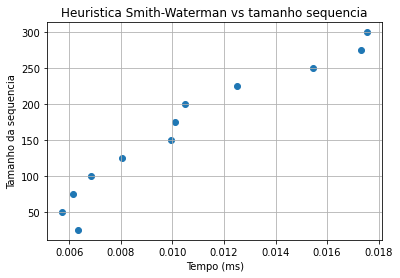

In [77]:
plt.scatter(tempos_heuristica_ss, tamanhos_ss)
plt.title("Heuristica Smith-Waterman vs tamanho sequencia")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia")
plt.grid()

Text(0.5, 0.92, 'Heuristica Smith-Waterman')

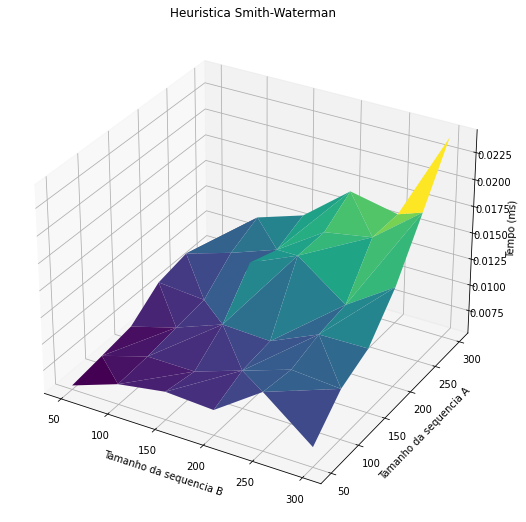

In [78]:
fig = plt.figure(figsize=(30,55))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_heuristica,cmap='viridis')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (ms)')
heuristica_graph.set_title('Heuristica Smith-Waterman')


### Proffiling

Abaixo temos o proffiling, que foi obtido atraves da ferramenta valgrind. OBS : A IMAGEM NÃO APARECE NO HTML, FAVOR OLHAR NO GIT :)

![Smith Waterman](images/smithwaterman-valgrind.png)

Como podemos observar acima, o principal ponto de lentidão do código é a parte em que a matriz H é criada, já que nessa parte é utilizado um for dentro do outro além de mexer com um vetor dentro de outro, o que acaba também sendo custoso.

# Parte 2 - Um algoritmo Local para Alinhamento

Para o algoritmo de busca local, a estratégia utilizada foi a aleatoridade. A busca local compara uma subsequencia com diversas outras subsequencias, de modo aleatório. O objetivo é tentar comparar o maior número de subsequencias para que com sorte o resultado seja satisfatório. 

Este algoritmo é o inverso da heuristica de Smith-Waterman, já que utliza pouco exploitation e muito exploration.

In [79]:
tempos_busca_local = []
for f in in_files:
  tempos_busca_local.append(roda_com_entrada('./busca-local','in-files/{}'.format(f)))

tempos_busca_local_ss = []
for f in in_files_ss:
  tempos_busca_local_ss.append(roda_com_entrada('./busca-local','in-files-ss/{}'.format(f)))

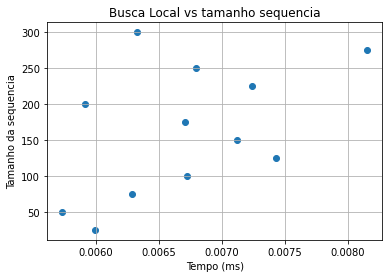

In [80]:
plt.scatter(tempos_busca_local_ss, tamanhos_ss)
plt.title("Busca Local vs tamanho sequencia")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia")
plt.grid()

Text(0.5, 0.92, 'Busca Local')

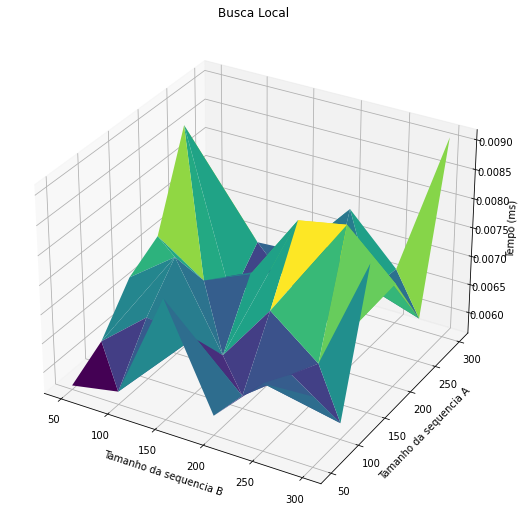

In [81]:
fig2 = plt.figure(figsize=(30,55))
b_local_graph = fig2.add_subplot(133, projection='3d')
b_local_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_busca_local,cmap='viridis')
b_local_graph.set_xlabel('Tamanho da sequencia B')
b_local_graph.set_ylabel('Tamanho da sequencia A')
b_local_graph.set_zlabel('Tempo (ms)')
b_local_graph.set_title('Busca Local')

### Proffiling

Abaixo temos o proffiling, que foi obtido atraves da ferramenta valgrind. OBS : A IMAGEM NÃO APARECE NO HTML, FAVOR OLHAR NO GIT :)

![busca-local-valgrind](images/busca-local-valgrind.png)

Como podemos observar acima, o principal ponto de lentidão do código é a parte em que é gerado as subsequencias de B no loop for, já que nele a função generate_subsequence é chamada p vezes. Porém esse ponto de lentidão não é tão relevante em relação ao resto do código, já que o algoritmo já é bem rápido e se encontra relativamente otimizado em questão de tempo.

# Parte 3 - Busca Exaustiva para Alinhamento de Sequencias

De forma geral, a busca exaustiva gera todas as subsequências possíveis das duas sequências e compara todas elas entre si. Porém, um problema acaba aparecendo, que é como comparar duas subsequências de tamanho diferente? A estratégia utilizada foi o truncamento da subsequencia maior pelo tamanho da subsequência menor, ou seja, a subsequencia menor é comparada com todas as possíveis substrings da subsequencia maior. 

Porém o que foi percebido é que não faz sentido comparar subsequencias de tamanhos diferente, já que todas as substrings da subsequencia maior já foram geradas anteriormente, logo esse passo acaba sendo redundante. Desse modo, o algoritmo exaustivo gera todas as substrigns possíveis das sequências e comparam todas as que possuem o mesmo tamanho, o que acaba poupando tempo e otimizando o código.

Este algoritmo utiliza apenas exploration, e nada de exploitation


In [82]:
tempos_exaustiva = []
for f in in_files:
  tempos_exaustiva.append(roda_com_entrada('./busca-exaustiva','in-files/{}'.format(f)))

tempos_exaustiva_ss = []
for f in in_files_ss:
  tempos_exaustiva_ss.append(roda_com_entrada('./busca-exaustiva','in-files-ss/{}'.format(f)))

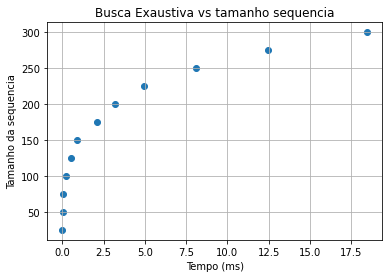

In [83]:
plt.scatter(tempos_exaustiva_ss, tamanhos_ss)
plt.title("Busca Exaustiva vs tamanho sequencia")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia")
plt.grid()

Text(0.5, 0.92, 'Busca Exaustiva')

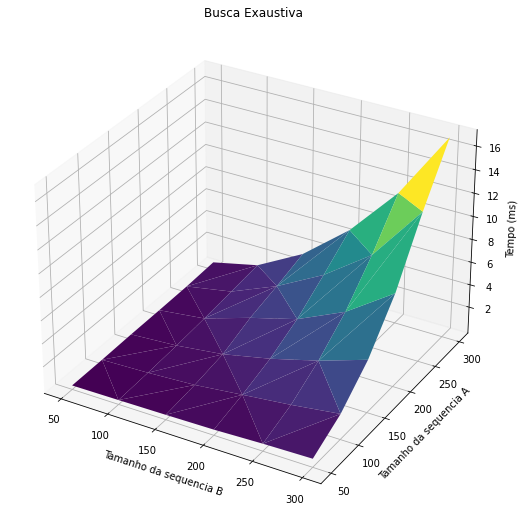

In [84]:
fig3 = plt.figure(figsize=(30,55))
b_exaust_graph = fig3.add_subplot(133, projection='3d')
b_exaust_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_exaustiva,cmap='viridis')
b_exaust_graph.set_xlabel('Tamanho da sequencia B')
b_exaust_graph.set_ylabel('Tamanho da sequencia A')
b_exaust_graph.set_zlabel('Tempo (ms)')
b_exaust_graph.set_title('Busca Exaustiva')

### Proffiling

Abaixo temos o proffiling, que foi obtido atraves da ferramenta valgrind. 
OBS : A IMAGEM NÃO APARECE NO HTML, FAVOR OLHAR NO GIT :)

![busca-local-exaustiva](images/busca-exaustiva-valgrind.png)

Como podemos observar acima, o principal ponto de lentidão do código é exatamente o esperado, a parte em que é feito a comparação exaustiva entre todas as possíveis subsequencias, já que nessa parte é utilizado um for dentro de outro for que checa o tamanho de cada subsequencia. 

# Parte 4 - Paralelismo com OpenMP

Após experimentar as três estratégias sequenciais para o problema de alinhamento de sequencias de DNA, esta etapa do projeto tem como objetivo explorar estratégias de paralelismo, nesse caso, um modelo multicore utilizando a CPU. Para isso vamos utilizar a biblioteca openMP, e assim será feita uma comparação de tempo de execução entre a busca exaustiva sequencial e a busca exaustiva paralelizada com CPU

In [124]:
tempos_exaust_openMP = []
for f in in_files:
  tempos_exaust_openMP.append(roda_com_entrada('./busca-exaustiva-openMP','in-files/{}'.format(f)))

tempos_exaust_openMP_ss = []
for f in in_files_ss:
  tempos_exaust_openMP_ss.append(roda_com_entrada('./busca-exaustiva-openMP','in-files-ss/{}'.format(f)))

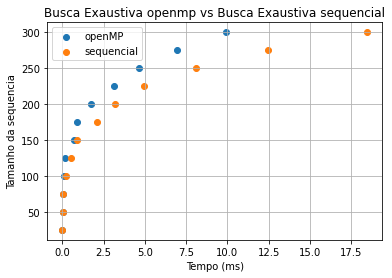

In [125]:
plt.scatter(tempos_exaust_openMP_ss, tamanhos_ss, label="openMP")
plt.scatter(tempos_exaustiva_ss, tamanhos_ss, label="sequencial")
plt.title("Busca Exaustiva openmp vs Busca Exaustiva sequencial")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia")
plt.grid()
plt.legend()

Text(0.5, 0.92, 'Exaustiva openMP')

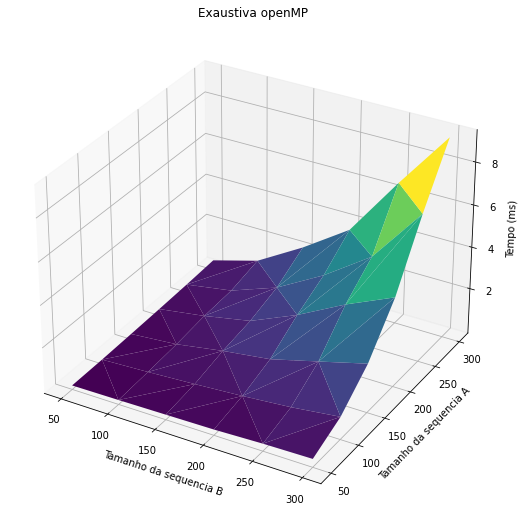

In [87]:
fig4 = plt.figure(figsize=(30,55))
exaust_openMP_graph = fig4.add_subplot(133, projection='3d')
exaust_openMP_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_exaust_openMP,cmap='viridis')
exaust_openMP_graph.set_xlabel('Tamanho da sequencia B')
exaust_openMP_graph.set_ylabel('Tamanho da sequencia A')
exaust_openMP_graph.set_zlabel('Tempo (ms)')
exaust_openMP_graph.set_title('Exaustiva openMP')

Os gŕaficos 2D e 3D acima, comparam a busca exaustiva sequencial e a busca exaustiva paralelizada com CPU com sequencias que variam de tamanho entre 50 e 300. Pode-se notar que ambos algoritmos tem desempenho de tempo similar até sequencias de tamanho 125, após isso, com sequencias maiores, nota-se que o algoritmo que utiliza a biblioteca openMP consegue ter um tempo melhor do que o algoritmo sequencial, o que era totalmente esperado.

# Parte 5 - Paralelismo com GPU


Esta etapa do projeto tem como objetivo explorar estratégias de paralelismo, nesse caso, um modelo manycore com GPU.
Para isso vamos utilizar a biblioteca Cuda da nvidia, e assim será feita uma comparação de tempo de execução entre a busca exaustiva sequencial e a busca exaustiva paralelizada com GPU

In [88]:
tempos_exaust_GPU_ss = []
for f in in_files_ss:
  tempos_exaust_GPU_ss.append(roda_com_entrada('./busca-exaustiva-GPU','in-files-ss/{}'.format(f)))

In [89]:
tempos_exaust_GPU = []
for f in in_files_bigger:
  tempos_exaust_GPU.append(roda_com_entrada('./busca-exaustiva-GPU','in-files-bigger/{}'.format(f)))

Text(0.5, 0.92, 'Exaustiva GPU')

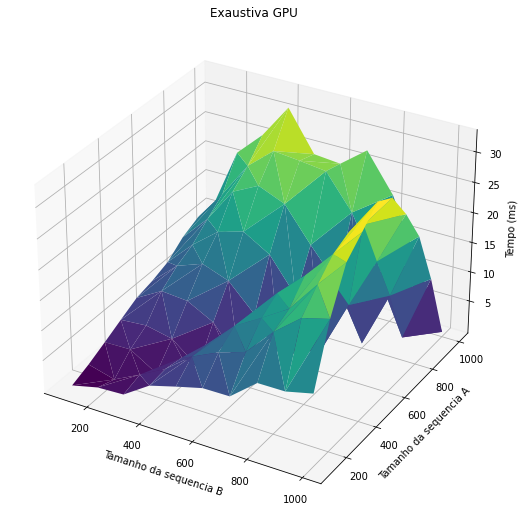

In [115]:
fig5 = plt.figure(figsize=(30,55))
exaust_GPU_graph = fig5.add_subplot(133, projection='3d')
exaust_GPU_graph.plot_trisurf(tamanhos_bigger_B, tamanhos_bigger_A, tempos_exaust_GPU, cmap='viridis')
exaust_GPU_graph.set_xlabel('Tamanho da sequencia B')
exaust_GPU_graph.set_ylabel('Tamanho da sequencia A')
exaust_GPU_graph.set_zlabel('Tempo (ms)')
exaust_GPU_graph.set_title('Exaustiva GPU')

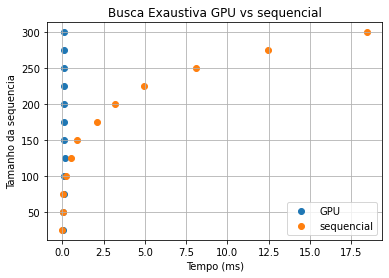

In [117]:
plt.scatter(tempos_exaust_GPU_ss, tamanhos_ss, label="GPU")
plt.scatter(tempos_exaustiva_ss, tamanhos_ss, label="sequencial")
plt.title("Busca Exaustiva GPU vs sequencial")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia")
plt.grid()
plt.legend()

Quando comparamos o algoritmo exaustivo paralelizado com GPU com o algoritmo exaustivo sequencial, nota-se um ganho muito expressivo. O algorimo com GPU quando colocado em uma situação com sequencias menores, não tem uma performance muito diferente da sequencial, no entanto, com sequências maiores, com tamanhos acima de 125, podemos ver um desempenho de tempo muito melhor, e esse desempenho aumenta exponencialmente conforme o tamanho das sequencias também aumentam.

# Parte 6 - Conclusão

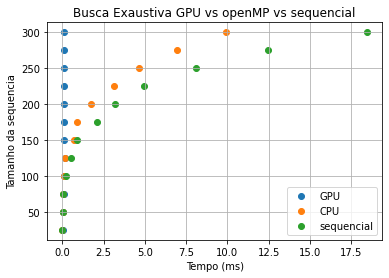

In [126]:
plt.scatter(tempos_exaust_GPU_ss, tamanhos_ss, label="GPU")
plt.scatter(tempos_exaust_openMP_ss, tamanhos_ss, label="CPU")
plt.scatter(tempos_exaustiva_ss, tamanhos_ss, label="sequencial")
plt.title("Busca Exaustiva GPU vs openMP vs sequencial")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia")
plt.grid()
plt.legend()

No caso da heuristica de Smith-Waterman, com o aumento do tamanho das entradas, é possível notar que o tempo de execução também aumenta, o que pode ser observado no gráfico 3d acima. No entanto, como essa estratégia leva os gaps em consideração, e as outras duas estratégias não, os resultados podem variar muito, logo fica difícil comparar o resultado entre elas. Outro ponto é que não há garantia de que o resultado seja de fato o resultado ótimo, porém aparentemente, o resultado acaba sendo bem próximo. A heuristica de Smith-Waterman teve uma velocidade relativamente boa, e um resultado razoável, logo, é possível afirmar que essa é talvez a estratégia mais equilibrada dentre as 3 apresentadas. Em termos de otimização, como essa é uma estratégia balanceada, tanto o tempo de execução como o resultado poderiam ser aprimorados um pouco.

Como pode-se observar, na busca local, aparentemente, o tamanho das sequências não afeta tanto o tempo de execução, o que pode ser observado no gráfico 3d acima. A busca local é a mais rápida dentre as 3 estratégias, porém o resultado é o pior de todos. Em termos de otimização, esse algoritmo poderia melhorar para conseguir um resultado mais próximo do ótimo.

No caso da busca exaustiva sequencial, com o aumento das entradas, seu tempo aumenta exponencialmente, o que pode ser observado no gráfico 3d acima. Logo, fica evidente que a busca exaustiva sequencial, como esperado, é a pior em questão de tempo ,sendo extramemente lenta para sequências grandes, demorando quase 1000 vezes mais em alguns casos, porém, a grande vantagem é que a busca exaustiva consegue com toda certeza o resultado ótimo. Em termos de otimização, fica evidente que o que deve ser aprimorado é o tempo de execução, isso poderia ser feito por exemplo com uma estratégia similar a de branch and bound, o que economizaria muito tempo cortando caminhos desnecessários. Outra solução seria paralelizar a execução do programa, o que foi de fato feito no final deste projeto.

Desse modo, temos 3 tipos de busca exaustiva para comparação, a sequencial, paralelizada com CPU e paralelizada com GPU. Quando comparamos as performances com sequencias pequenas, os 3 algoritmos são similares. No entanto, conforme o tamanho das sequencias aumenta, nota-se que o algoritmo com GPU tem um desempenho muito superior aos outros dois, e esse ganho é exponencial. Logo pode-se concluir que o melhor desses 3 seria o algoritmo paralelizada com GPU, já que em sequências pequenas os 3 tem desempenho similar, e para sequencias grandes o com GPU é sem dúvidas o melhor.
